<h1>Regressão Múltipla com dados de Plano de Saúde</h1>

In [1]:
#Importando bibliotecas inicias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from scipy.stats import pearsonr

warnings.filterwarnings("ignore")

<h3>Analise Exploratoria do Dados</h3>

<p>Iniciamos o estudo importando os dados e realizando uma análise preliminar de sua qualidade. Nesta primeira etapa, devemos observar os tipos de variáveis e fazer quaisquer alterações necessárias para melhor ajustar os dados. Se uma variável específica estiver no tipo errado, as saídas durante o processo de modelidadem serão incorretas, levando a previsões e ações imprecisas.

Em seguida, é essencial observar o conjunto de dados de forma geral, buscando por dados faltantes, erros ou dados preenchidos de forma incorreta. Se algum desses casos for encontrado, é necessário definir uma estratégia de ação. No caso de dados com esses comportamentos, quando eles têm uma representação extremamente pequena em relação ao número de observações presentes, podemos simplesmente descartar as respectivas observações. No entanto, devemos ter cuidado e analisar o impacto dessa operação em cada caso.</p>

In [2]:
#Atribuindo o dataframe com o datas iniciais
raw_data = pd.read_csv('/Users/rabernar/Visual Studio/Projetos VsCode/Virtual_DS_Jupy/MBA Data Science/Regressão Linear e Multipla/planosaude.csv')
raw_data.head()

,id,despmed,idade,dcron,renda,plano
0,1,206.84,57,5,57.200001,bronze
1,2,184.19,67,4,67.199997,bronze
2,3,175.68,62,4,62.000000,bronze
3,4,180.04,67,5,67.199997,bronze
4,5,218.86,68,5,68.000000,bronze


É de grande importancia realizar a visualização das informações dos dados, bem como das estatisticas descritivas gerais. Por meio dessas informações corrigimos o tipo da variável ID, originalmente como um float para uma variavel categorica. Além disso podemos observar que não existe valores outliers na amostra de estudo.

In [3]:
#Observando tipos e quantidade de valores nulos
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       200 non-null    int64  
 1   despmed  200 non-null    float64
 2   idade    200 non-null    int64  
 3   dcron    200 non-null    int64  
 4   renda    200 non-null    float64
 5   plano    200 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


<p>Continuando com as analises iniciais podemos verificar os tipos das variáveis que compõem o conjunto de dados. Observamos que a variável 'plano' referente ao tipo de plano foi importada como objeto, além disso, o "id" foi importado como int64, dessa forma fizemos a alteração para o formato correto.</p>

In [4]:
#Corrigindo os tipos das variáveis
raw_data['plano'] = raw_data['plano'].astype('category')
raw_data['id'] = raw_data['id'].astype('category')

<p>Finalizando a primeira etapa de importação de dados e análise preliminar, buscamos verificar a presença de valores discrepantes, que não estão de acordo com o contexto das respectivas variáveis, além de iniciar a observação dos comportamentos de distribuição dos dados. </p>

In [5]:
#Observando as estatisticas descritivas gerais
raw_data.describe()

,despmed,idade,dcron,renda
count,200.000000,200.000000,200.000000,200.000000
mean,161.183400,50.010000,2.705000,50.022000
std,42.447084,12.547794,1.670908,12.626538
min,88.730000,32.000000,0.000000,31.600000
25%,126.140000,38.000000,1.000000,38.000000
50%,155.000000,49.000000,2.000000,48.799999
75%,197.622500,63.000000,4.000000,63.200001
max,269.200000,68.000000,5.000000,68.000000


<h3>Analises Gráficas</h3>

<p>Com o intuito de facilicar e aumentar a agilidade no momento de criação dos gráficos para cada uma das variáveis que compõe o dataset, declaramos as funções abaixo, definindo os parâmetro que desejamos para a construção dos visuais</p>

In [6]:
#Definindo função para plotagem de boxplot
def boxplot(name, df):
    f, ax = plt.subplots(figsize=(12,6))
    custom_params1 = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style = 'ticks', rc= custom_params1)
    ax = sns.boxplot(df[name])
    ax.set_title(name.capitalize(), fontsize = 20)
    plt.show

In [7]:
#Definindo função para plotagem de histograma
def histogram(column_name, data, bins = 10, kde=False):
    plt.subplots(figsize=(12,6))
    params = {"axes.spines.right": False, "axes.spines.top": False}
    ax = sns.histplot(data[column_name], bins = 10, kde=kde)
    ax.set_xlabel(column_name.capitalize(), fontsize = 14)
    ax.set_ylabel("")
    ax.set_title(f'Histograma - {column_name.capitalize()}', fontsize = 16)


<p>Começamos a gerar gráficos para visualizar a distribuição e o comportamento das variáveis dependentes e independentes. Utilizando um histograma, podemos observar a forma da distribuição da variável dependente, dessa forma, direcioná-la para a função de densidade de probabilidade com o objetivo de descrever seu comportamento.</p>

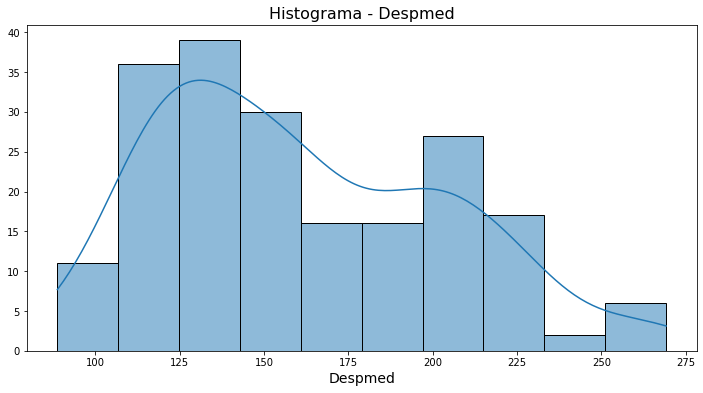

In [8]:
histogram('despmed', raw_data, 20, True)

<p>Em seguida utilizando ainda as funções criadas, observamos o comportamento da distribuição das demais variáveis</p>

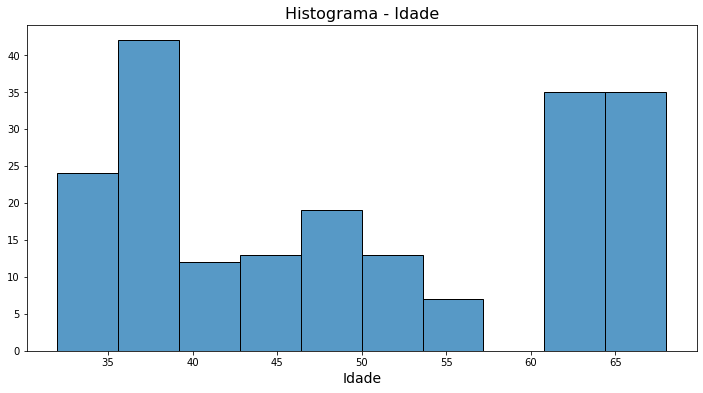

In [9]:
histogram('idade', raw_data)

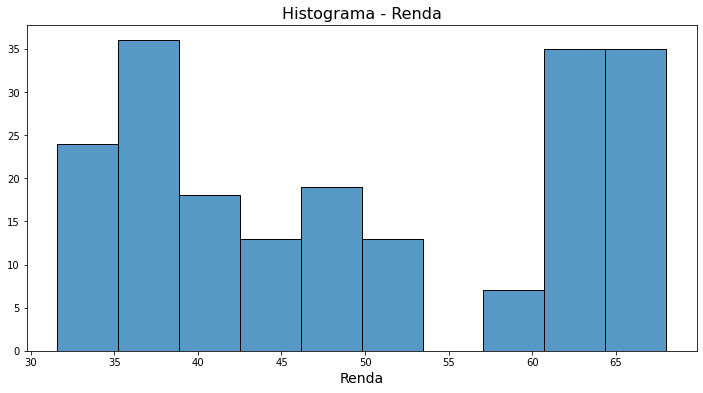

In [10]:
histogram('renda', raw_data)

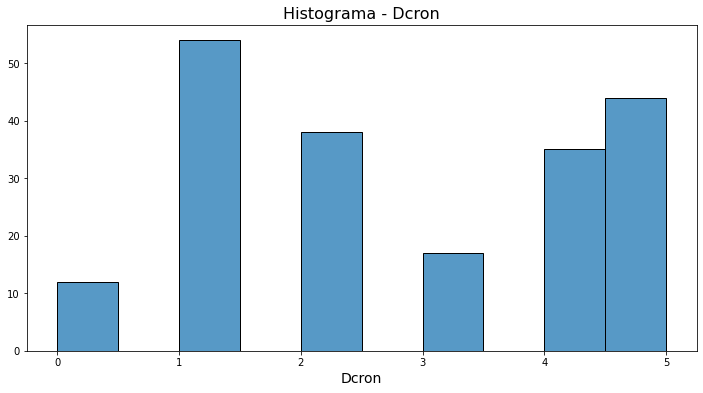

In [11]:
histogram("dcron", raw_data)

<p>Antes de iniciar propiamente o processo de modelagem, analisamos como as correlações entre as variáveis do conjunto de dados se comportam. Por meio da função declarada abaixo, geramos um gráfico que apresenta o relacionamento das variáveis, bem como informações estatísticas sobre as correlações:</p>

<Figure size 1080x720 with 0 Axes>

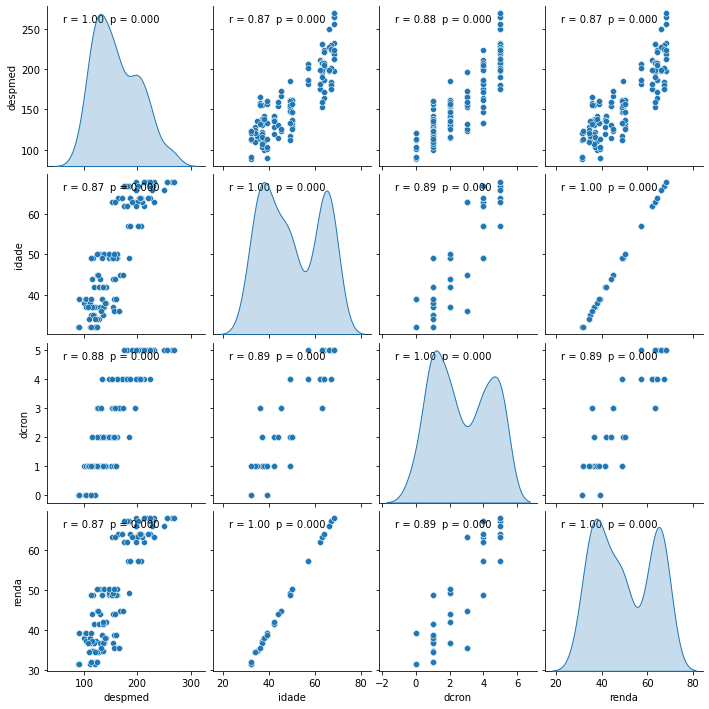

In [12]:
#Definindo função para correlação de pearson
def correlation(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(raw_data.loc[:,"despmed":"renda"], diag_kind="kde", palette='vlag')
graph.map(correlation)
plt.show()

<p>Ao finalizar as analises iniciais dos dados, observamos a existencia de correlação entre as variaveis que compoe o dataset e a variável objeto do estudo, a despesa médica. Por meio do pairplot conseguimos visualizar o comportamento da distribuição das observações relacionadas em cada um dos pares. Porém além das variaveis quantitativas presentes no dataset, possuimos a variavel planoe do plano, qualitativa, dessa forma precisamos realizar o procedimento de dummização para utiliza-la no modelo.</p>

<h3>Modelagem dos Dados - Preparação</h3>

<p>Antes de prosseguir com a modelagem, discutimos um pouco sobre variáveis dummy e sua utilidade. Variáveis dummy têm o objetivo de transformar variáveis categóricas em uma ou mais variáveis binárias que podem ser usadas em modelos estatísticos.

Esse processo é extremamente importante, pois evita atribuições arbitrárias de dados, o que levaria a um erro no modelo final. Para obter as variáveis dummy, definindo os valores zero e um associados a cada uma das categorias existentes, definimos uma categoria como referência e as demais.</p>

In [13]:
#Dummização das variáveis categoricas presentes no dataframe
raw_data_dummie = pd.get_dummies(raw_data, columns=['plano'], drop_first=True)

In [14]:
raw_data_dummie

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro
0,1,206.84,57,5,57.200001,0,0
1,2,184.19,67,4,67.199997,0,0
2,3,175.68,62,4,62.000000,0,0
3,4,180.04,67,5,67.199997,0,0
4,5,218.86,68,5,68.000000,0,0
...,...,...,...,...,...,...,...
195,196,159.02,63,3,63.200001,1,0
196,197,205.35,64,4,64.000000,0,0
197,198,133.64,49,4,48.799999,1,0
198,199,158.73,44,2,44.000000,1,0


<p>Como mostrado acima, o primeiro passo no conjunto de dados trabalhado foi a criação de variáveis dummy associadas às categorias existentes de planos de saúde. Definimos um dos planos como referência, gerando assim apenas duas novas colunas no conjunto de dados.</p>

<h3>Modelagem dos Dados - Criação do Modelo</h3>

<p>Após a transformação das variáveis, torna-se possível executar o modelo OLS, utilizando os gastos médicos como variável dependente e as demais variáveis, idade, dcron, renda e suas respectivas classes como variáveis independentes.</p>

In [15]:
#Criando objeto com a lista de colunas que serão utilizadas no modelo
columns_model = list(raw_data_dummie.drop(columns=['id','despmed']).columns)
dummies_model = ' + '.join(columns_model)
dummies_model = "despmed ~ " + dummies_model

In [16]:
columns_model

['idade', 'dcron', 'renda', 'plano_esmeralda', 'plano_ouro']

In [17]:
dummies_model

'despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro'

In [18]:
#Criação do modelo
heath_model = sm.OLS.from_formula(dummies_model,
                                        raw_data_dummie).fit()

print(heath_model.summary())

                            OLS Regression Results                            
Dep. Variable:                despmed   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     262.3
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           2.88e-84
Time:                        13:42:08   Log-Likelihood:                -828.04
No. Observations:                 200   AIC:                             1668.
Df Residuals:                     194   BIC:                             1688.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         148.8596     12.744     

<p>Pelos indicadores do modelo, observamos a existência de betas não estatisticamente significativos, ou seja, com um valor-p maior que 0,05 (Trabalhando com um nível de confiança de 95,0%).
Uma vez que foram observadas interações entre as variáveis em questão durante a análise, utilizamos o método Stepwise para realizar testes sucessivos combinando os diferentes betas e avaliando a significância estatística para cada cenário.</p>

In [19]:
#Importando stepwise para iteração dos betas no teste
from stepwise_process.statsmodels import stepwise

In [20]:
heath_model_step = stepwise(heath_model, 0.05)

Regression type: OLS 

Estimating model...: 
 despmed ~ idade + dcron + renda + plano_esmeralda + plano_ouro

 Discarding atribute "renda" with p-value equal to 0.12394651280126574 

Estimating model...: 
 despmed ~ idade + dcron + plano_esmeralda + plano_ouro

 Discarding atribute "idade" with p-value equal to 0.11501748716136027 

Estimating model...: 
 despmed ~ dcron + plano_esmeralda + plano_ouro

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'renda', 'p-value': 0.12394651280126574}
{'atribute': 'idade', 'p-value': 0.11501748716136027}

 Model after stepwise process...: 
 despmed ~ dcron + plano_esmeralda + plano_ouro 

                            OLS Regression Results                            
Dep. Variable:                despmed   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                   

<p>Após rodar o stepwise, observamos que apenas três variáveis permaneceram no modelo, sendo elas dcron e as classes dos planos. Para validar o modelo e prosseguir com o desenvolvimento, realizamos o teste de Shapiro-Francia para verificar a normalidade dos resíduos e o.</p>

In [21]:
#Importando shapiroFrancia para realizar o teste de normalidade
from sfrancia import shapiroFrancia

In [22]:
method, statistics_W, statistics_Z, Pvalue = shapiroFrancia(heath_model_step.resid).values()
print(f'Statistics W: {statistics_W.round(4)}\nStatistics Z: {statistics_Z.round(4)}\nPvalue: {Pvalue.round(10)}')
shapiro_francia_result1 = pd.DataFrame({'Statistics W':statistics_W, 'Statistics Z': statistics_Z, 'P-value':Pvalue}, index=[0])
shapiro_francia_result1

Statistics W: 0.9429
Statistics Z: 4.6096
Pvalue: 2.0173e-06


,Statistics W,Statistics Z,P-value
0,0.942917,4.609587,0.000002


In [23]:
#Importando o norm para plotagem e verificação gráfica dos residuos
from scipy.stats import norm
from scipy import stats

Text(0.5, 1.0, 'Comportamento - Normalidade dos Resíduos')

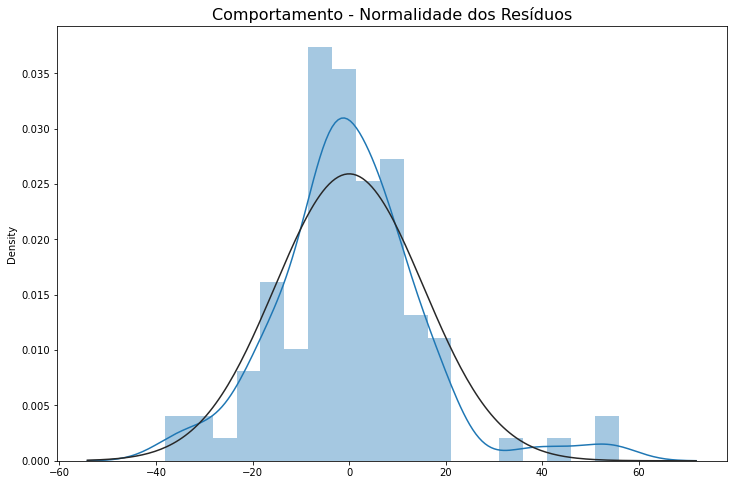

In [24]:
ax = sns.distplot(heath_model_step.resid, fit=norm, kde=True)
ax.figure.set_size_inches(12,8)
ax.set_title("Comportamento - Normalidade dos Resíduos", fontsize = 16)

<p>Obtivemos um p-value inferior a 0,05, sendo neste caso para o teste de Shapiro-Francia rejeitamos a hipótese nula, o que significa, que a normalidade existe. Seguindo a hipótese alternativa não temos a normalidade dos resíduos. Para complementar a análise dos resultados, realizamos o teste de Breusch-Pagan para verificar a presença de heteroscedasticidade antes de prosseguir com as transformações necessárias.</p>

In [25]:
#Definindo a função para executar o teste de Breusch Pagan
def breusch_pagan_test(model):

    df = pd.DataFrame({'yhat':model.fittedvalues,
                       'resid':model.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq.round(4)}")
    
    print(f"p-value: {p_value}")
    

In [26]:
breusch_pagan_test(heath_model_step)

chisq: 60.8018
p-value: 6.4125863037357946e-15


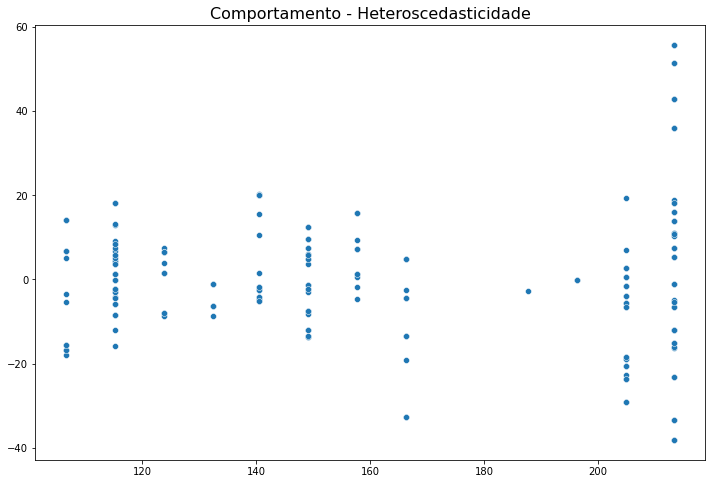

In [27]:
#Plotando gráfico para verificar o comportamento dos fitted x residuo
ax1 = sns.scatterplot(heath_model_step.fittedvalues, heath_model_step.resid)
ax1.set_title("Comportamento - Heteroscedasticidade", fontsize=16)
ax1.figure.set_size_inches(12,8)

<p>Como resultado observamos um gráfico com o comportamento de heterocedasticidade, além disso obtemos um p-value no teste Breusch-Pagan menor que 0,05, para o teste devemos então descartar a hipotese nula seguindo com a hipotese alternativa que confirma a existencia de heterocedasticidade.</p> 

<p>Um ponto que é importante destacar com relação a heterocedasticidade é sua associação não somente a ausencia de betas significantes ao modelo, como tambem a utilização de uma forma funcional não corretamente adaptada a variável de estudo em questão. Visando esta segunda possibilidade partimos para a transformação dos dados utilizando o método Box-Cox.</p>

<p>Iniciamos o processo de transformação importando a função boxcox do scipy.stats. Definimos o valor de lambda e transformamos os dados da variável passando a variável dependente como entrada.</p>

In [28]:
#Importando boxcox para realizar a transformação
from scipy.stats import boxcox

In [29]:
#Instanciando o lambda para o processo
x, lmbda = boxcox(raw_data_dummie['despmed'])
print(f'Lambda: {lmbda}')
print(f'First Values: {x[:5]}')

Lambda: -0.14436741694478952
First Values: [3.718813   3.66464869 3.64229506 3.65389877 3.74486701]


<p>Adicionamos os dados transformados ao dataframe com os valores já dummizados</p>

In [30]:
raw_data_dummie['despmed_bc'] = x
raw_data_dummie.head()

,id,despmed,idade,dcron,renda,plano_esmeralda,plano_ouro,despmed_bc
0,1,206.84,57,5,57.200001,0,0,3.718813
1,2,184.19,67,4,67.199997,0,0,3.664649
2,3,175.68,62,4,62.000000,0,0,3.642295
3,4,180.04,67,5,67.199997,0,0,3.653899
4,5,218.86,68,5,68.000000,0,0,3.744867


<p>Uma vez que realizamos a transformação dos dados novamente rodamos um modelo utilizando todas as variaveis disponiveis, caso seja encontrado variaveis sem a significancia adequada, partimos então para o uso do stepwise</p>

In [31]:
#Aplicando modelo apos a transformação nos dados
heath_model_bc = sm.OLS.from_formula('despmed_bc ~ idade + dcron + renda + plano_esmeralda + plano_ouro', raw_data_dummie).fit()
print(heath_model_bc.summary())

                            OLS Regression Results                            
Dep. Variable:             despmed_bc   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     325.5
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           2.80e-92
Time:                        13:42:09   Log-Likelihood:                 355.33
No. Observations:                 200   AIC:                            -698.7
Df Residuals:                     194   BIC:                            -678.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5507      0.034    1

<p> De maneira similar ao modelo antes da transformação as variaveis idade e renda apresentaram novamente betas não significantes, logo utilizamos o stepwise para obter os betas estatisticamente significantes nos diferentes cenarios</p>

In [41]:
#Utilizando o stepwise para validar as significancia dos betas presentes
heath_model_step_bc = stepwise(heath_model_bc, 0.05)

Regression type: OLS 

Estimating model...: 
 despmed_bc ~ idade + dcron + renda + plano_esmeralda + plano_ouro

 Discarding atribute "renda" with p-value equal to 0.3565250619389967 

Estimating model...: 
 despmed_bc ~ idade + dcron + plano_esmeralda + plano_ouro

 Discarding atribute "idade" with p-value equal to 0.16481169113205202 

Estimating model...: 
 despmed_bc ~ dcron + plano_esmeralda + plano_ouro

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'renda', 'p-value': 0.3565250619389967}
{'atribute': 'idade', 'p-value': 0.16481169113205202}

 Model after stepwise process...: 
 despmed_bc ~ dcron + plano_esmeralda + plano_ouro 

                            OLS Regression Results                            
Dep. Variable:             despmed_bc   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:         

<p>Caminhando para a parte final do processo, buscamos as validações através dos testes dos residuos, quanto a sua normalidade e heterocedasticidade.</p>

In [33]:
#Exibindo os valores encontrados para o novo teste Shapiro Francia
method, statistics_W, statistics_Z, Pvalue = shapiroFrancia(heath_model_step_bc.resid).values()
print(f'Statistics W {statistics_W.round(4)}\nStatistics Z {statistics_Z.round(4)}\nPvalue {Pvalue.round(10)}')

Statistics W 0.9869
Statistics Z 1.5678
Pvalue 0.0584618672


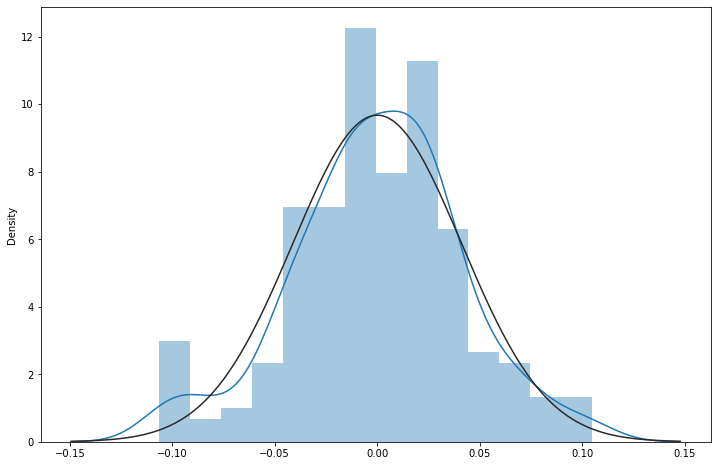

In [34]:
#Plotando gráfico para checar normalidade dos residuos
ax3 = sns.distplot(heath_model_step_bc.resid, fit=norm, kde=True)
ax3.figure.set_size_inches(12,8)

<p>Conseguimos observar no grafico plotado como as curvas estão proximas e a distribuição dos dados se assemelham a normalidade, além disso no teste, Shapiro-Francia, verificamos que o p-value é maior que 0,05 e dessa forma seguimos com a hipotese nula que existe normalidade nos residuos. </p>

In [35]:
#Exibindo valores encontrados no teste Breusch Pagan
breusch_pagan_test(heath_model_step_bc)

chisq: 1.0126
p-value: 0.4778875003744613


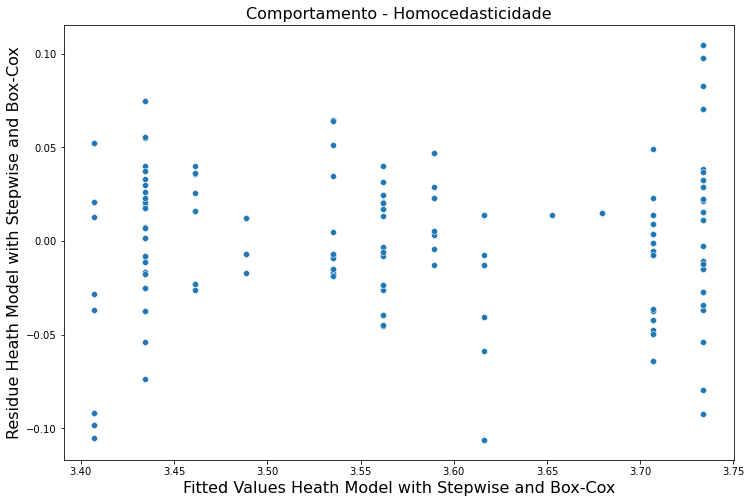

In [36]:
#Plotando gráfico para verificar o comportamento dos fitted x residuo do novo modelo apos a transformação
ax1 = sns.scatterplot(heath_model_step_bc.fittedvalues, heath_model_step_bc.resid)
ax1.set_xlabel('Fitted Values Heath Model with Stepwise and Box-Cox',
           fontsize=16)
ax1.set_ylabel('Residue Heath Model with Stepwise and Box-Cox',
           fontsize=16)
ax1.set_title("Comportamento - Homocedasticidade", fontsize=16)

ax1.figure.set_size_inches(12,8)


<p>Da mesma forma com o teste Breusch-Pagan, obtemos um valor de pvalue maior que 0,05, além de observar pelo comportamento do gráfico a homocedasticidade, logo não temos heterocedasticidade.</p>

<h3>Conclusão</h3>

<p>Concluímos este estudo que tem como objetivo demonstrar as diferentes etapas envolvidas em uma modelagem por regressão múltipla, observando ao longo do processo os diferentes tipos de testes que são realizados e como por vezes o cenário que enfrentamos nos leva a buscar alternativas e métodos para viabilizar a modelagem, como o caso das transformações que nesse estudo foi selecionado a de Box-Cox.</p>